In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [52]:
G = nx.gnp_random_graph(100, 0.5, directed=False)

In [53]:
degrees = []
for node in G.nodes:
    degrees.append(G.degree(node))

In [54]:
fit_params = stats.powerlaw.fit(degrees)
print(fit_params)

(0.806293493305347, 39.99999999999999, 24.00000000000001)


(array([0.005, 0.02 , 0.04 , 0.04 , 0.105, 0.085, 0.095, 0.035, 0.03 ,
        0.03 , 0.01 , 0.005]),
 array([40., 42., 44., 46., 48., 50., 52., 54., 56., 58., 60., 62., 64.]),
 [<matplotlib.patches.Polygon at 0x7f79d8eb7640>])

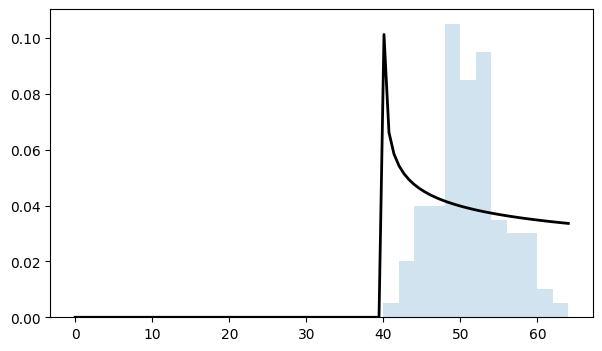

In [55]:
plt.figure(figsize=(7,4))
x = np.linspace(0, max(degrees), 100)
pdff = stats.powerlaw.pdf(x, *fit_params)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.hist(degrees, bins='auto', histtype='stepfilled', density=True, alpha=0.2, label='Degree distribution')

In [56]:
def kld(p,q):
    assert len(p) == len(q)
    # assume they are defined on the same sample space
    kl = 0
    for ii in range(len(p)):
        if p[ii] > 0 and q[ii] > 0:
            kl += p[ii] * np.log(p[ii]/q[ii])
    return kl

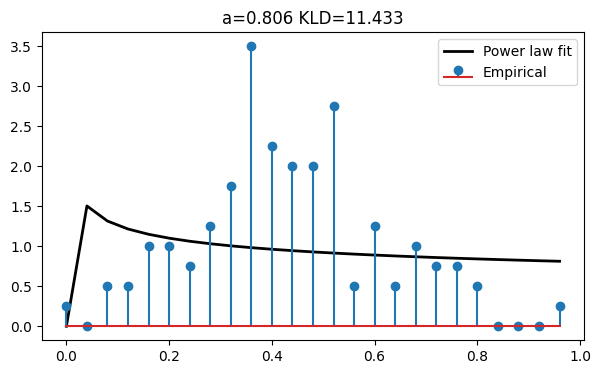

In [57]:
degrees_normalized = (degrees - fit_params[1]) / fit_params[2]
hist, bins = np.histogram(degrees_normalized, 
                          bins=25, 
                          #range=(0, np.max(degrees_normalized)), 
                          density=True)
bins = bins[0:-1]
# shifted
plt.figure(figsize=(7,4))
x = bins
pdff = stats.powerlaw.pdf(x, fit_params[0])
kl = kld(hist, pdff)
plt.plot(x, pdff, 'k-', lw=2, label='Power law fit')
plt.stem(bins, hist, label='Empirical')
plt.title('a=%0.03f KLD=%0.03f' % (fit_params[0], kl))
plt.legend()

In [58]:
min(degrees_normalized)

2.9605947323337496e-16

In [59]:
stats.powerlaw.pdf(min(degrees_normalized), fit_params[0])

821.2740303601479

In [60]:
np.log(0)

/var/folders/nz/szh1vbf12cd7rwgcnt99cwkc0000gn/T/ipykernel_74384/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf